In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from warnings import filterwarnings
filterwarnings("ignore")

## Problem 1A:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [2]:
data= pd.read_csv('SalaryData.csv')

In [5]:
data.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [6]:
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [8]:
data.describe()

Salary
count      40.000000
mean   162186.875000
std     64860.407506
min     50103.000000
25%     99897.500000
50%    169100.000000
75%    214440.750000
max    260151.000000

#### State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Ho : mu1 = mu2 = m3 = ....muk All the means are equals

H1 : at-least one means is unequal.

Hypothesis with Education:

Null Hypothesis (Ho): The mean salary earned by the People is same with different categories of educational qualification (High school graduate, Bachelor, and Doctorate.)

Alternate hypothesis (Ha): The mean salary earned by the People is different in at-least one category of educational qualification.

Hypothesis with Occupation:

Null Hypothesis (Ho) : The mean salary earned by the People is same with different categories of occupation .


Alternate hypothesis (Ha) : The mean salary earned by the People is different in at least one category of occupation.

#### Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Hypothesis with Education:

Null Hypothesis (Ho): The mean salary earn by the People is same with different categories of educational qualification (High school graduate, Bachelor, and Doctorate.)

Alternate hypothesis (Ha): The mean salary earn by the People is different in at-least one category of educational qualification.

Assumptions involved in using ANOVA:
1.    The samples drawn from different populations are independent and random.
2.    The variances of all the populations are equal.
3.    The response variables of all the populations are normally distributed. Central Limit Theorem(CLT) assert that sample mean       follows normal distribution, even if the population distribution is not normall, when sample size is at least 30.

In [10]:
formula = 'Salary ~ C(Education)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Conclusion : We have evidence to reject the null hypothesis, since p value < Level of significance (0.05) Accept the Alternate hypothesis (Ha): The mean salary earn by the People is different in at-least one category of educational qualification.



#### Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

Null Hypothesis (Ho) : The mean salary earn by the People is same with different categories of occupation .

Alternate hypothesis (Ha) : The mean salary earn by the People is different in at least one category of occupation.

Assumptions involved in using ANOVA:

1. The samples drawn from different populations are independent and random.
2. The variances of all the populations are equal.
3. The response variables of all the populations are normally distributed. Central Limit Theorem(CLT) assert that sample mean follows normal distribution, even if the population distribution is not normall, when sample size is at least 30.

In [11]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Conclusion : We have no evidence to reject the null hypothesis, since p value > Level of significance(0.05) Accept the Null Hypothesis (Ho) : The mean salary earn by the People is same with different categories of occupation.

#### If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

salary with education where i found the null hypothesis is rejected 
I use the tukeyhsd to check in which class means are significantly different.

In [12]:
mc= MultiComparison(data.Salary , data.Education)

In [14]:
result=mc.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


Conclusion: In the above result I observe that all class means with each other have significant differences. reject the null hypothesis.

## Problem 1B:

#### What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

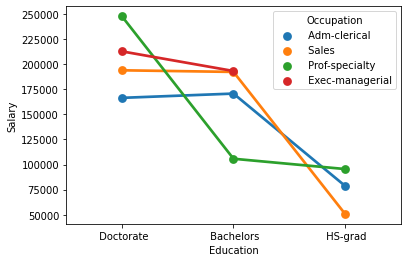

In [15]:
sns.pointplot(x="Education",y="Salary",data=data,hue="Occupation",ci=None);

As seen from the above plot, there seems to be interaction among the four categorical variables.

1. Doctorate education salary is high if there occupation is Prof-specialty and low if there occupation  is Adm-clerical.
2. Sales salary is very low in HS-grad education but if we compare in Bachelors education then sales salary is equal to Exe-managerial occupation which is highest in bachelors education.
3. if education is same HS-grad then Prof-specialty occupation salary is high.

If we also do the statistical analysis we see below table C(Education):C(Occupation) 4.227791e+10 6.0 9.909463 1.323371e-05 p < 0.05 it means there is interaction between variables Education and Occupation.

In [16]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education) * C(Occupation) '
model = ols(formula, data).fit()
aov_table = anova_lm(model,typ=3)
(aov_table)

C:\Users\prade\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


sum_sq    df           F        PR(>F)
Intercept                   8.742674e+10   1.0  122.951013  6.022884e-12
C(Education)                1.686040e+10   2.0   11.855657  1.726495e-04
C(Occupation)               2.028454e+10   3.0    9.508931  1.556271e-04
C(Education):C(Occupation)  4.227791e+10   6.0    9.909463  1.323371e-05
Residual                    2.062102e+10  29.0         NaN           NaN

#### Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

If we perform along with interaction Education*Occupation 
We have to use typ=3

Null Hypothesis (Ho): The means 'Salary' variable for Education, occupation and interaction level is equal.

Alternate hypothesis (Ha) : At least one of the means "Salary" variables  for Education, occupation and interaction level is unequal.

In [17]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education) * C(Occupation) '
model = ols(formula, data).fit()
aov_table = anova_lm(model,typ=3)
(aov_table)

C:\Users\prade\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


sum_sq    df           F        PR(>F)
Intercept                   8.742674e+10   1.0  122.951013  6.022884e-12
C(Education)                1.686040e+10   2.0   11.855657  1.726495e-04
C(Occupation)               2.028454e+10   3.0    9.508931  1.556271e-04
C(Education):C(Occupation)  4.227791e+10   6.0    9.909463  1.323371e-05
Residual                    2.062102e+10  29.0         NaN           NaN

Conclusion : we have evidence to reject the null Hypothesis, since p<Level of significance(0.05) so we reject the null hypothesis and accept the Alternate hypothesis (Ha) : At least one of the means "Salary" variable for Education, occupation and interaction level is unequal.

If we Perform a two-way ANOVA based on Salary with respect to both Education and Occupation. We use typ=2

Null Hypothesis (Ho): The means of 'Salary' variable with respect to each Education category and occupation is equal

Alternate hypothesis (Ha) : At least one of the means of "Salary" variable with respect to each Education category and occupation is unequal

In [18]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, data).fit()
aov_table = anova_lm(model,typ=2)
(aov_table)

sum_sq    df          F        PR(>F)
C(Education)   9.695663e+10   2.0  29.510933  3.708479e-08
C(Occupation)  5.519946e+09   3.0   1.120080  3.545825e-01
Residual       5.585261e+10  34.0        NaN           NaN

Conclusion : we have evidence to reject the null Hypothesis, since p<Level of significance(0.05) so we reject the null hypothesis and accept the Alternate hypothesis(Ha):At least one of the means of "Salary" variable with respect to each Education category and occupation is unequal

#### Explain the business implications of performing ANOVA for this particular case study.

In [ ]:
Ask the expert.

## Problem 2:



The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [2]:
data= pd.read_csv('Education+-+Post+12th+Standard.csv')

In [3]:
data.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [4]:
data.isnull().values.any()

False

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [24]:
data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

#### Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

Univariate Analysis :

In [29]:
data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

Insight:

1. Data consists of 777 colleges with 17 features.  
2. All fields have equal count.
3. Fields Apps, Accent, Enroll, F.Undergrad and P.Undergrad mean and median difference is high so there are outliers.
4. No. of part time undergraduate students is less than full time undergraduate.

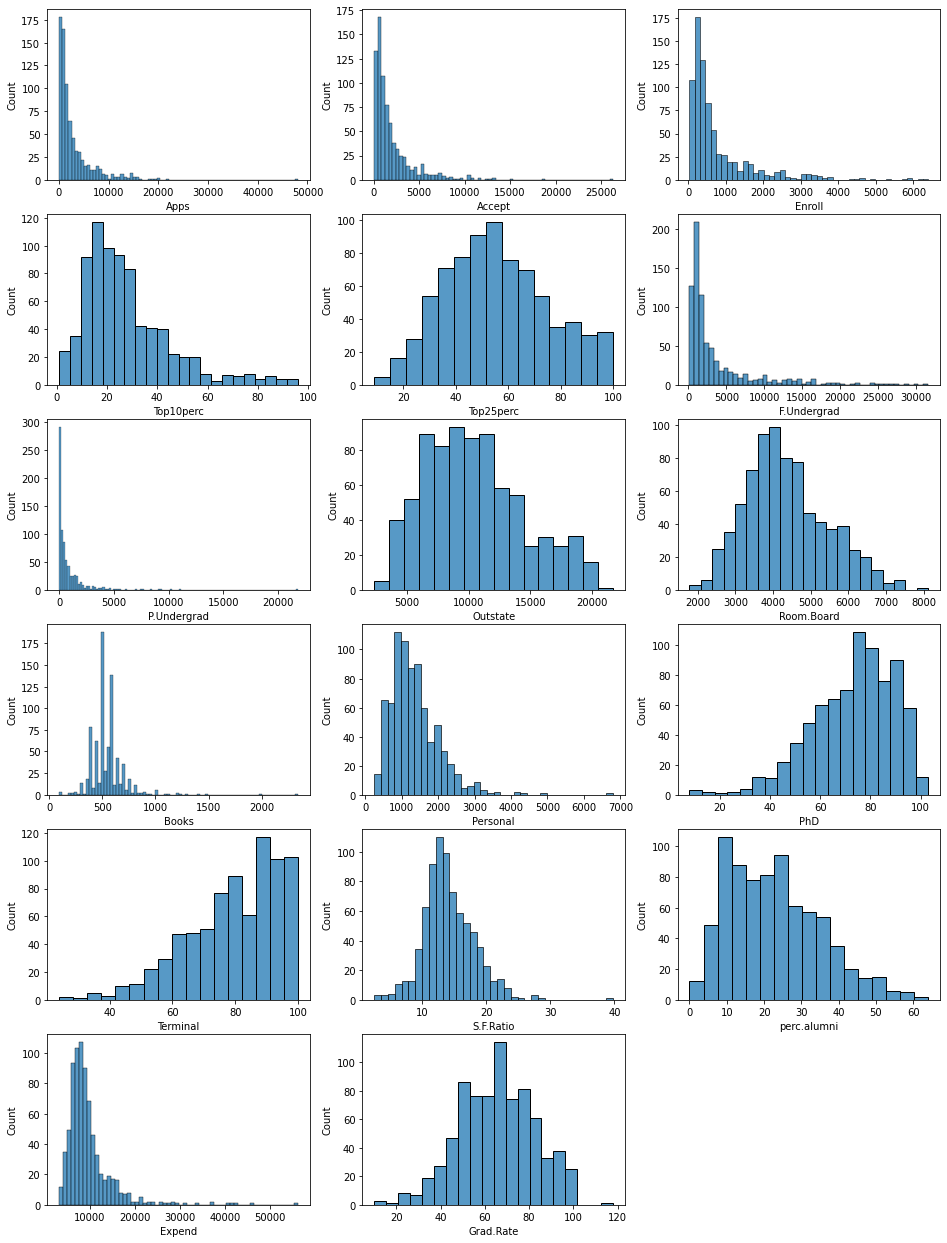

In [5]:
data_copy= data.drop("Names",axis=1)
plt.figure(figsize=(16,22))
j=1
for i in data_copy:
    plt.subplot(6,3,j)
    sns.histplot(data_copy[i])
    j=j+1

Insight:

1. fields Apps, Accept, Enroll, F.Undergrad, P.Undergrad, Personal, perc.alumni and Expend have right skewness.
2. fields Phd, Terminal and Grad.Rate have left skewness
3. fields Top25perc is seems normal distribution.

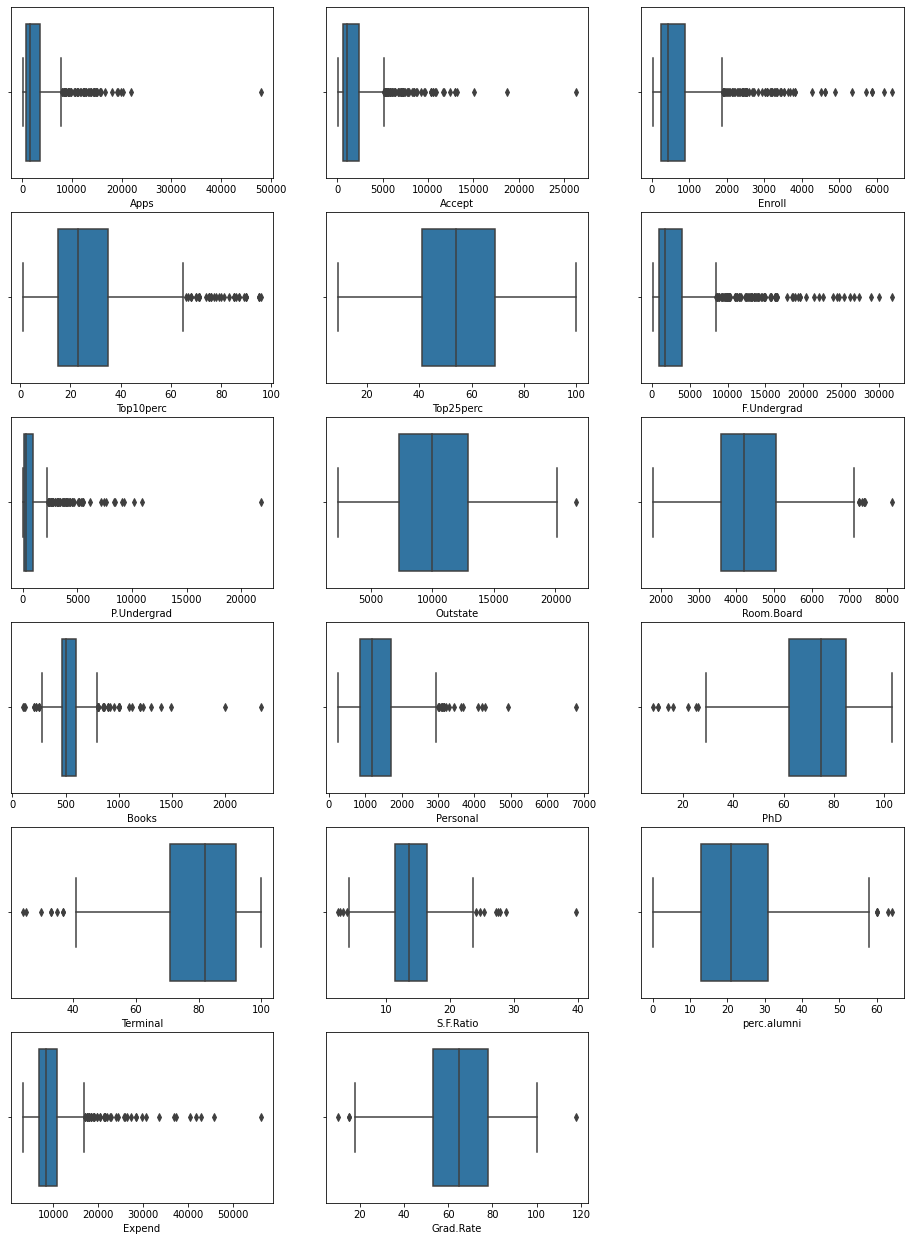

In [28]:
plt.figure(figsize=(16,22));
j=1
for i in data_copy:
    plt.subplot(6,3,j);
    sns.boxplot(data_copy[i]);
    j=j+1

Insight:

1. In the boxplot most of the variables seems outliers except Top25perc.
2. in some of the fields seems less outiers outstates, Room.Board, perc.alumni and Grad.Rate

Bivariate Analysis:

<AxesSubplot:>

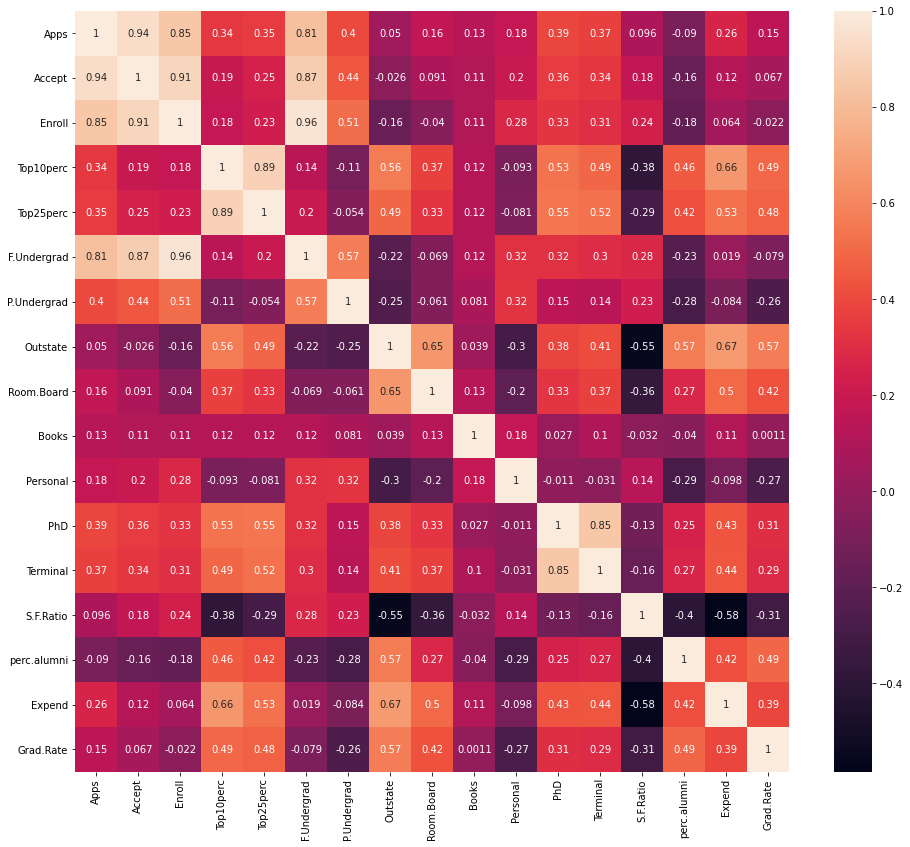

In [34]:
plt.figure(figsize=(16,14),)
sns.heatmap(data_copy.corr(), annot=True)

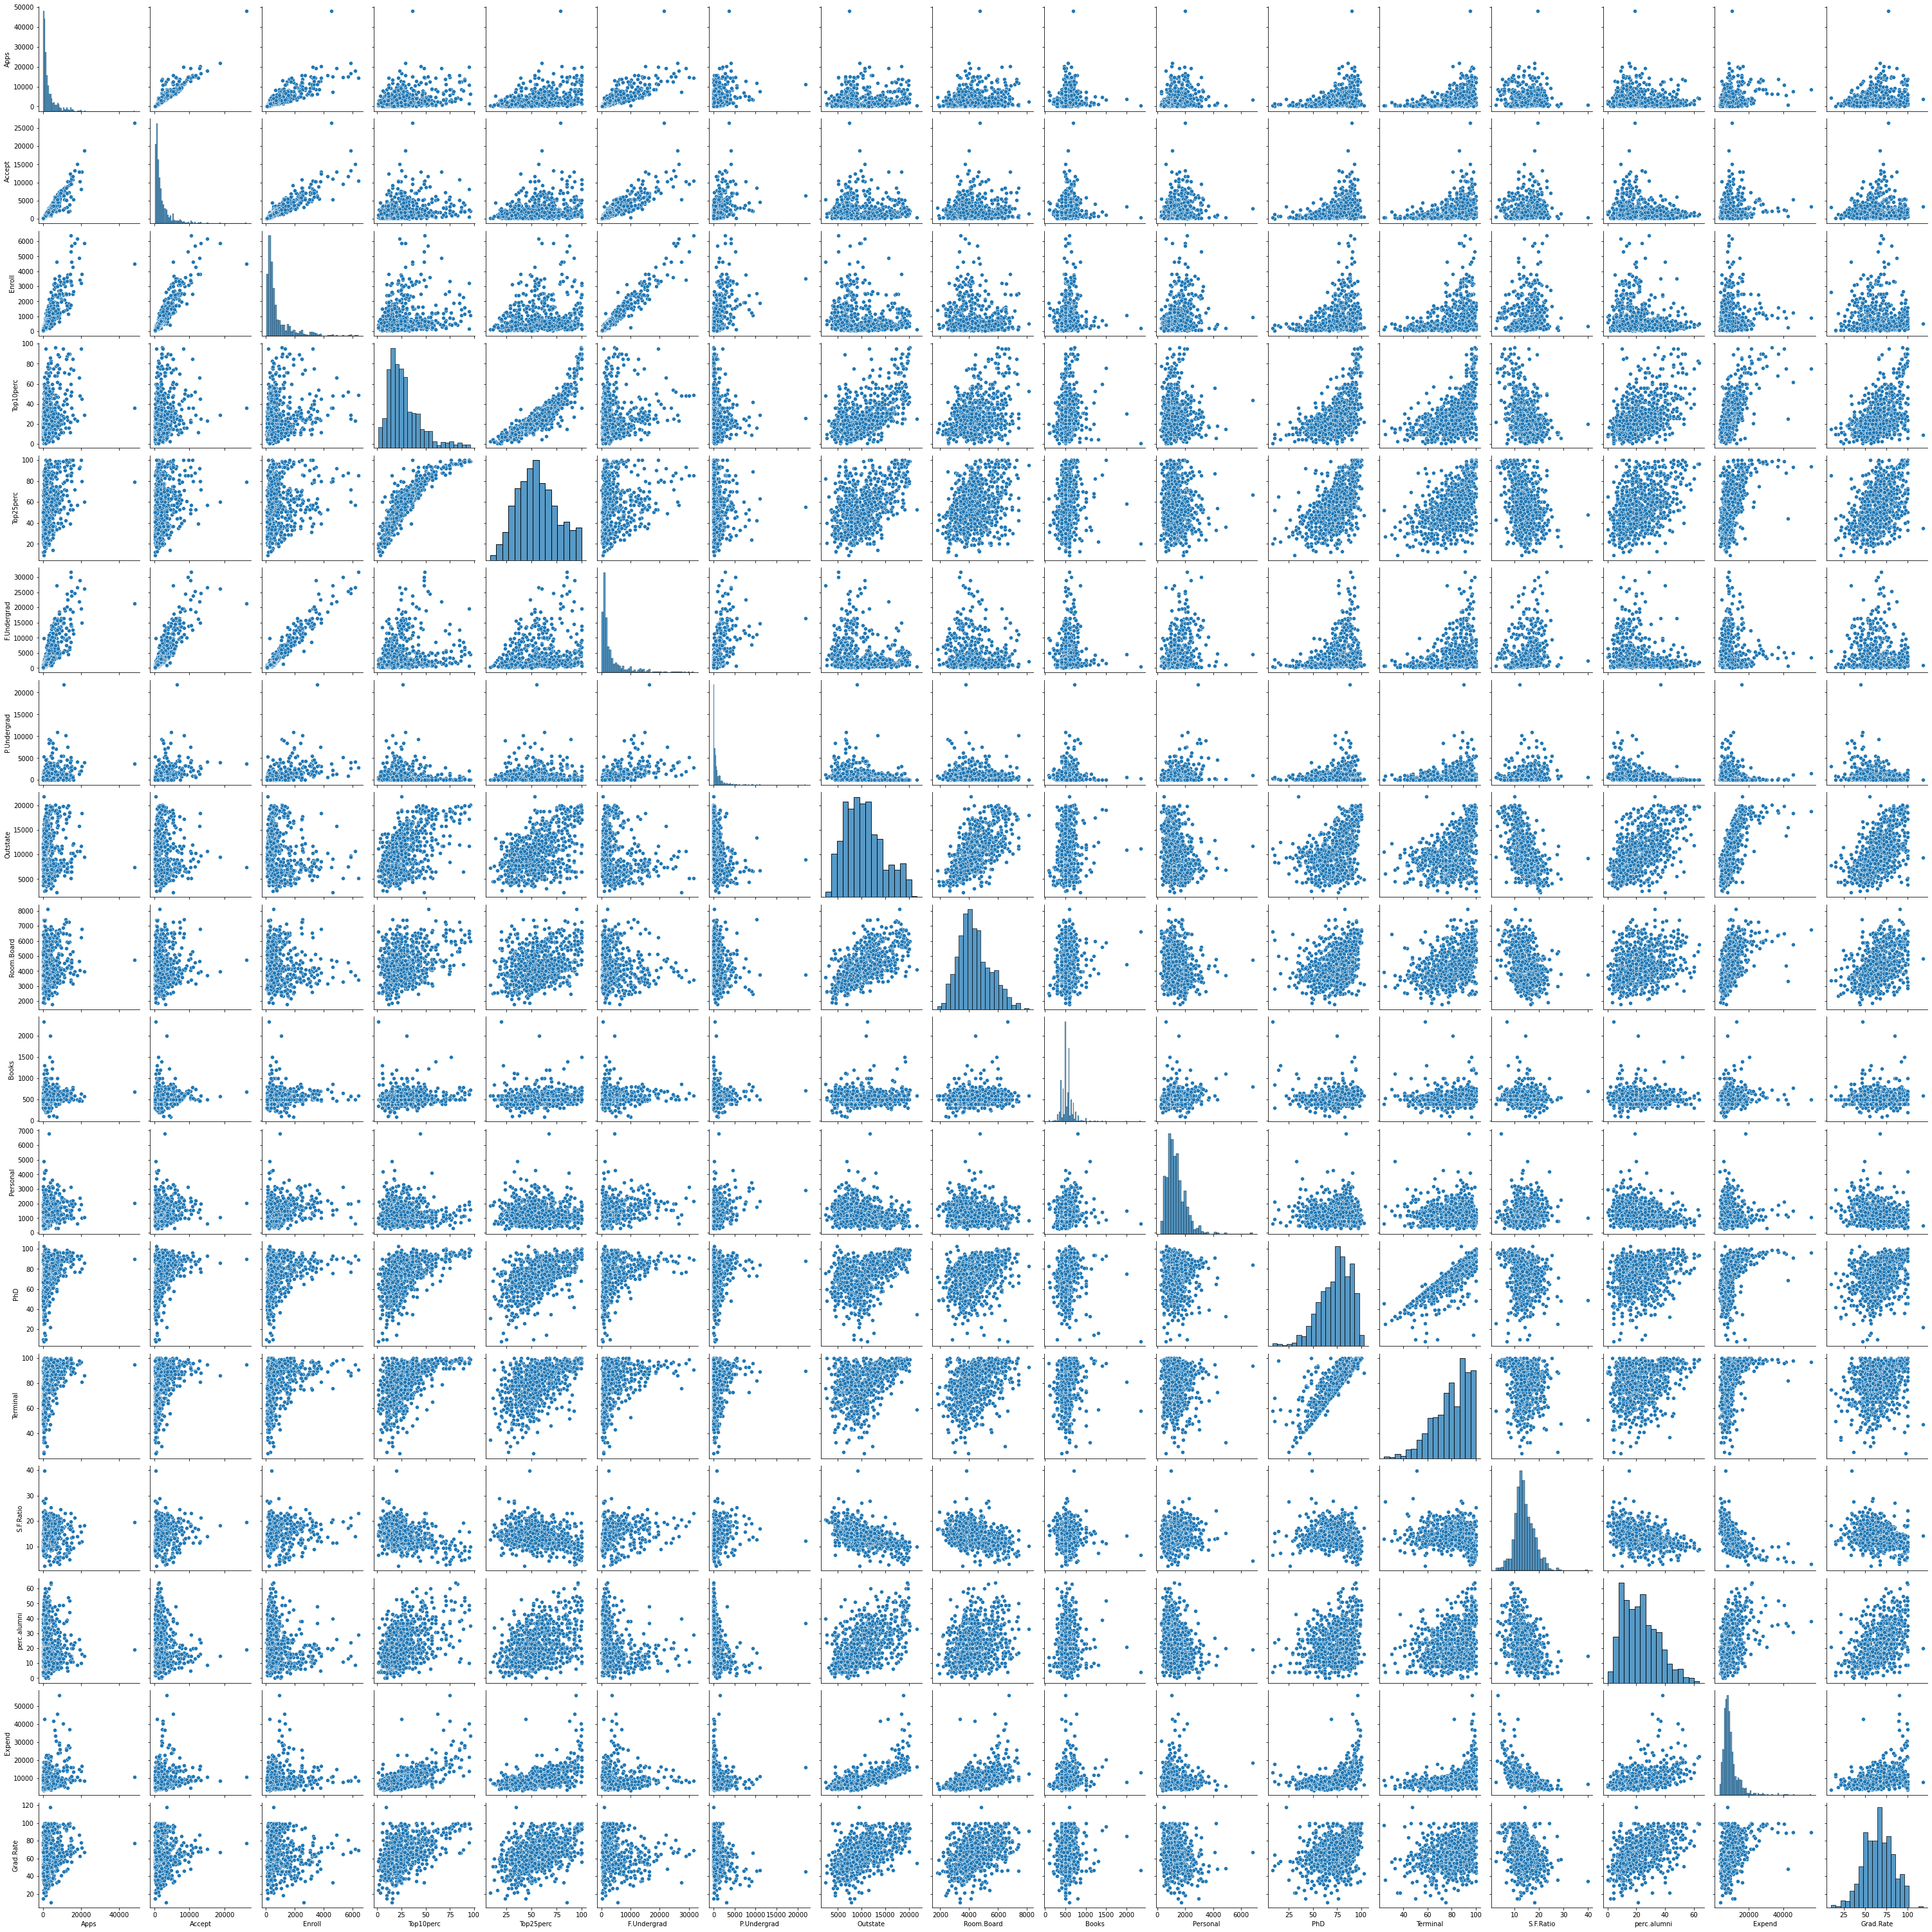

In [32]:
sns.pairplot(data_copy)

Insight:

There are considerable number of features that are highly correlated.

Accept variable show highly crrelation with Apps and Enroll.
F.undergraduate is highly correlation with Enroll.


#### Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [35]:
data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

Scaling is necessary for PCA in this case because I can see in the above described data and say that data is with different weights. It is recommended to transform the features so that all features are in the same scale.

In [6]:
## Using Zscore for scaling/standardisation


from scipy.stats import zscore
data_scaled=data_copy.apply(zscore)
data_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [7]:
data_scaled.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

#### Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

comparison between the covariance and the correlation


Both covariance and correlation measure the relationship and the dependency between two variables

Covariance indicates the direction of the linear relationship between variables while Correlation measures both the strength and direction of the linear relationship between two variables

Correlation values are standardized. Covariance values are not standardized.

In [9]:
data_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [43]:
cov_matrix=np.cov(data_scaled.T)
print(cov_matrix)

[[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0.54656564
   0.5254

#### Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

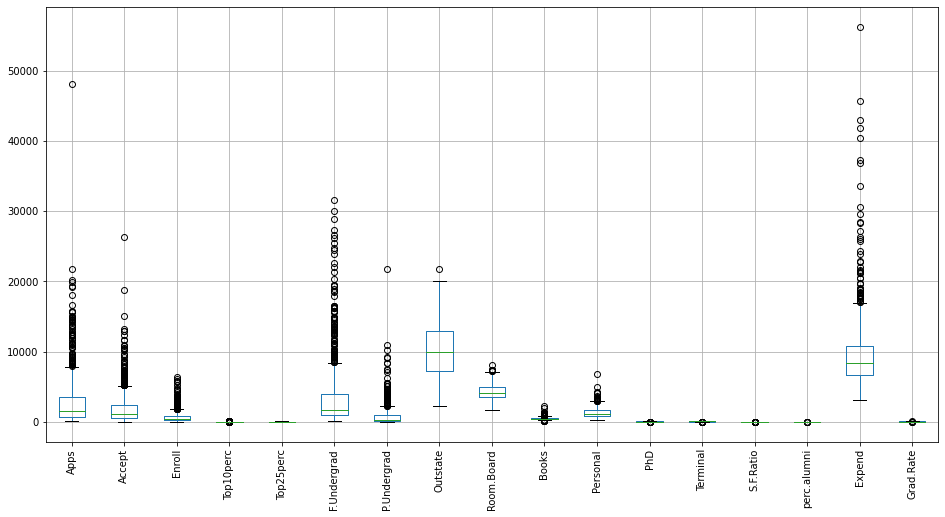

In [45]:
plt.figure(figsize=(16,8))
data_copy.boxplot()
plt.xticks(rotation = 90);

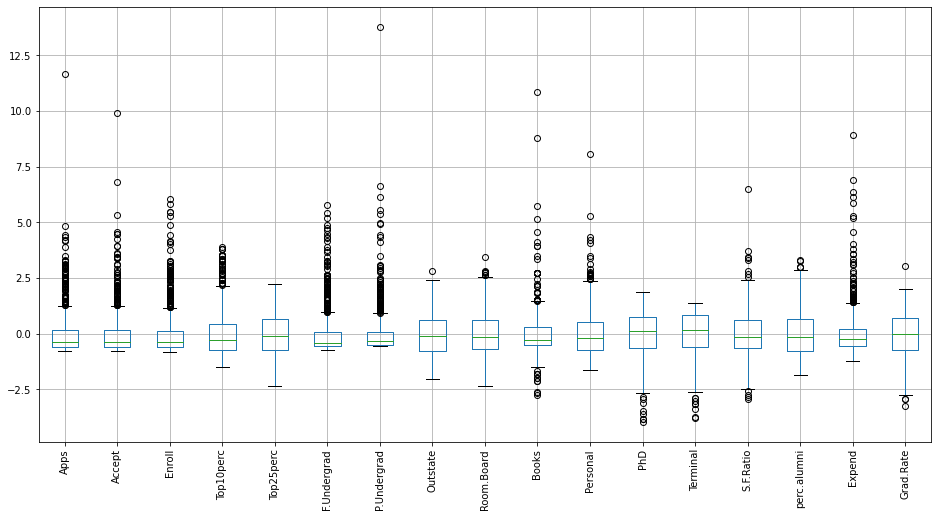

In [46]:
plt.figure(figsize=(16,8))
data_scaled.boxplot()
plt.xticks(rotation = 90);

1. If we look at the boxplot after the scaling all the boxplot is comparable.
2. Before the scaling boxplot look is not comparable because of some variable boxplot looking very big and some is very small      so there is no sense to compare with each other in boxplot.
3. we can see Outstate variable this is the big boxpot but if we see the Top10perc, Top25perc, PhD. etc. these are the very        small boxplot.

#### Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

Statistical tests to be done before PCA

Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated.

Ha: At least one pair of variables in the data are correlated.

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is at-least one pair of variables  in the data which are correlated hence PCA is recommended.

In [47]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_scaled)
p_value

0.0

Conclusion : We have evidence to reject the null hypothesis, since p value < Level of significance (0.05) Accept the Alternative hypothesis Ha: At least one pair of variables in the data are correlated. 

KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_scaled)
kmo_model

0.8131251200373522

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(data_scaled)


In [50]:
# eigenvector/ coefficient of pc1 ....... a1,a2,a3.......

pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [51]:
# eigenvalues This is always return is decending order
# represents the units of variability that captured by each principle components
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [49]:
var= np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2, 88.7, 91.8, 94.2, 96. ,
       97.3, 98.3, 99.1, 99.6, 99.8, 99.9])

As per the selection criteria of eigen values :
1. Consider all eigens wich has value of >=1.
2. Consider all eigens where the cumm variance is atleast 80%.

We are going to use only 6 components as per given selection criteria.

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(data_scaled)

In [53]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [54]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117])

#### Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

Statistical tests to be done before PCA

Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated.

Ha: At least one pair of variables in the data are correlated.

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [55]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_scaled)
p_value

0.0

Conclusion : We have evidence to reject the null hypothesis, since p value < Level of significance (0.05) Acept the Alternative hypothesis Ha: At least one pair of variables in the data are correlated.

KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_scaled)
kmo_model

0.8131251200373522

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(data_scaled)


In [57]:
var= np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2, 88.7, 91.8, 94.2, 96. ,
       97.3, 98.3, 99.1, 99.6, 99.8, 99.9])

As per the selection criteria of eigen values :

Consider all eigens wich has value of >=1.
Consider all eigens where the cumm variance is atleast 80%.
We are going to use only 6 components as per given selection criteria.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(data_scaled)

In [9]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(data_scaled))
df_pca_loading.shape

(6, 17)

In [60]:
df_pca_loading.head(8)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163

#### Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [10]:
df_pca_loading = round(pd.DataFrame(pca.components_,columns=list(data_scaled)),2)
df_pca_loading.head(8)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  0.25    0.21    0.18       0.35       0.34         0.15         0.03   
1  0.33    0.37    0.40      -0.08      -0.04         0.42         0.32   
2 -0.06   -0.10   -0.08       0.04      -0.02        -0.06         0.14   
3  0.28    0.27    0.16      -0.05      -0.11         0.10        -0.16   
4  0.01    0.06   -0.06      -0.40      -0.43        -0.04         0.30   
5 -0.02    0.01   -0.04      -0.05       0.03        -0.04        -0.19   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0      0.29        0.25   0.06     -0.04  0.32      0.32      -0.18   
1     -0.25       -0.14   0.06      0.22  0.06      0.05       0.25   
2      0.05        0.15   0.68      0.50 -0.13     -0.07      -0.29   
3      0.13        0.18   0.09     -0.23 -0.53     -0.52      -0.16   
4      0.22        0.56  -0.13     -0.22  0.14      0.20      -0.08   
5     -0.03        0.16   0.64     -0.33  0.09      0.15       0.49   

   perc.alumni  Expend  Grad.Rate  
0         0.21    0.32       0.25  
1        -0.25   -0.13      -0.17  
2        -0.15    0.23      -0.21  
3         0.02    0.08       0.27  
4        -0.22    0.08      -0.11  
5        -0.05   -0.30       0.22

linear equation of PC in terms of eigenvectors and corresponding features
PC= a1x1+a2x2...................anxn

In [11]:
print("PC1 =",df_pca_loading.iloc[0,]['Apps'],"* Apps +",df_pca_loading.iloc[0,]['Accept'],"* Accept +",df_pca_loading.iloc[0,]['Enroll'],"* Enroll +",df_pca_loading.iloc[0,]['Top10perc'],"* Top10perc +",df_pca_loading.iloc[0,]['Top25perc'],"* Top25perc +",df_pca_loading.iloc[0,]['F.Undergrad'],"* F.Undergrad +",df_pca_loading.iloc[0,]['P.Undergrad'],"* P.Undergrad +",df_pca_loading.iloc[0,]['Outstate'],"* Outstate +",df_pca_loading.iloc[0,]['Room.Board'],"* Room.Board +",df_pca_loading.iloc[0,]['Books'],"* Books +",df_pca_loading.iloc[0,]['Personal'],"* Personal +",df_pca_loading.iloc[0,]['PhD'],"* PhD +",df_pca_loading.iloc[0,]['Terminal'],"* Terminal +",df_pca_loading.iloc[0,]['S.F.Ratio'],"* S.F.Ratio +",df_pca_loading.iloc[0,]['perc.alumni'],"* perc.alumni +",df_pca_loading.iloc[0,]['Expend'],"* Expend +",df_pca_loading.iloc[0,]['Grad.Rate'],"* Grad.Rate")

PC1 = 0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate


#### Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(data_scaled)


In [63]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

Remark: the no. of Eigen values = no. of variable = default no. of principle components

for the dimension reduction we going to select the couple of them selection criteria of eigenvalues :
1. Consider all eigens which has value of >=1.
2. Consider all eigens where the cumm variance is at-least 80%

For the above eigen values we can consider the first 4 eigen values because this satisfies the first criteria to select the principal component. but before moving to conclusion we must check the second criteria.

Total variance explained by the first eigenvalues for checking the second criteria we follow the below formula.

percentage contribution by the first eigenvalues= (first eigenvalue/total sum of eigen value)*100 as we are looking for a cumulative sum we add and found that adding the first four eigenvalues we reach only 71.1% [32. , 58.3, 65.2, 71.1]

but we need at-least 80% so we add 2 more eigen values to reach that.

[32. , 58.3, 65.2, 71.1, 76.6, 81.6]

Remarks: if adding eigens which has value 1 or greater than 1 but not reaching cumm variance at-least 80% then we go with eigens value which is less than 1 to reach cumm variance 80% .

next part of question : What do the eigenvectors indicate?

eigen vectors indicate the coefficients or Factor loadings eg. PC= a1x1 + a2x2 + a3x3 + a4x4 + .......... +anxn
x= variables 
a= coefficients/ factor loadings

#### Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

Ask the Eexpert